# Complex System Simulation: Corals and Flows
#### _Group 12: Esther Bakels (12362980), Loes Bijman (15211312), Aleksandar Jacimovic (15278247), Boyan Mihaylov (15067602)_

## 1. Imports / Preliminaries

In [7]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import custom modules
import vis_tools as vt
import dla_model as dm
import dla_simulation as ds
import cs_measures as csm

from importlib import reload

## 2. Flow Functions

In [15]:
# Reload modules
reload(vt)
reload(dm)

<module 'dla_model' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\dla_model.py'>

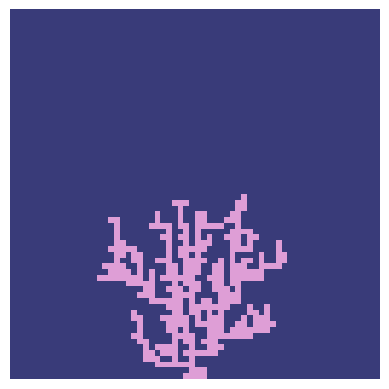

In [16]:
# Time / space parameters
size = 64
steps = 1000

# Environment parameters
Moore = False
obstacle = None
drift_vec = [0, -1]
sun_vec = [0, -1]
periodic = (False, False)
n_seeds = 1

# Initialize lattice
seeds = dm.init_seeds_bottom(size, n_seeds)
lattice = dm.init_lattice(size, seeds)

# Initialize obstacle lattice
if obstacle is not None:
    boxes = np.array([[15,17,19,35,10,20], [40, 45, 50, 55, 60, 55]])
    obstacle = dm.init_obstacle_lattice(size, boxes=boxes, seed_coords=seeds)
    print(np.sum(obstacle))

# Initialize particles
particle_density = 0.1
particles = dm.init_particles(lattice, particle_density, obstacles=obstacle)

# Arrays for storing time frames
# lattice_frames = np.empty((steps, size, size, size))
lattice_frames = np.empty((steps, size, size))
particles_frames = np.empty_like(lattice_frames)

current_lattice = np.array(lattice)
current_particles = np.array(particles)
for step in range(steps):
    
    # Record current state
    lattice_frames[step] = np.array(current_lattice)
    particles_frames[step] = dm.particles_to_lattice(current_particles, size)

    # Move particles
    current_particles = dm.move_particles_diffuse(current_particles, current_lattice, periodic=periodic, moore=Moore, obstacles=obstacle, drift_vec=drift_vec, regen_bndry=False)

    # Aggregate particles
    current_lattice, current_particles = dm.aggregate_particles(current_particles, current_lattice, None, moore=Moore, obstacles=obstacle, sun_vec=sun_vec)
    # print(f"step {step}: {current_lattice}")

# vt.animate_lattice(lattice_frames, interval=100)
vt.animate_lattice((lattice_frames*5 + particles_frames)/6, interval=100)
# obstacle_frames = np.array([obstacle for _ in lattice_frames])
# vt.animate_lattice((lattice_frames*5 + particles_frames + obstacle*2)/8, interval=100)

## 3. Fractal Dimension

In [10]:
# Reload modules
reload(csm)
reload(vt)

<module 'vis_tools' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

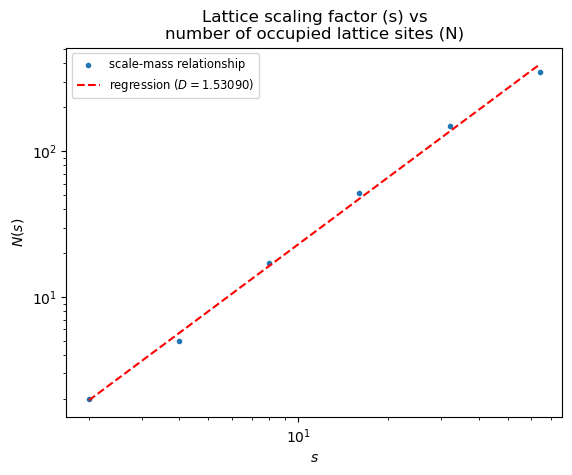

In [18]:
fractal_dims, scales, n_boxes, coeffs = csm.fractal_dimension_clusters(current_lattice, fit=True)

vt.plot_fractal_dimension(scales, n_boxes, coeffs)

## 4. Branching Distribution

In [11]:
reload(csm)
reload(vt)

<module 'vis_tools' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit


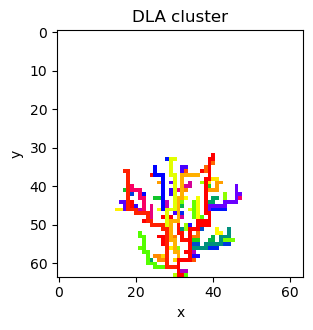

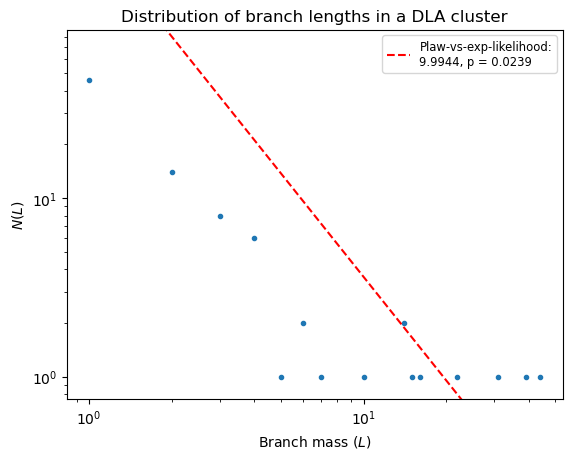

In [19]:
branch_lengths_unique, branch_length_counts, branches = csm.branch_distribution(current_lattice, seeds[0])
vt.plot_lattice(current_lattice, branches)
vt.plot_branch_length_distribution(branch_lengths_unique, branch_length_counts, branches)

## 5. Run Simulation Series

In [34]:
# Reload modules
reload(dm)
reload(ds)
reload(csm)
reload(vt)

<module 'vis_tools' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

### 5.1 Lattice Dimensions / Neighbourhood Types

In [5]:
# Define environment parameter series (2D setup)
lattice_size_series = np.array([256])
max_timesteps_series = np.array([20000])
n_seeds_series = np.array([[1]])
particle_density_series = np.array([0.1])
target_mass_series = np.array([int(0.025 * lattice_size_series[0]**2),
                               int(0.05 * lattice_size_series[0]**2)])
obstacle_box_series = np.array([None])
drift_vec_series = np.array([[0, -1]])
sun_vec_series = np.array([[0, -1]])

# Define environment parameter series (3D setup)
# lattice_size_series = np.array([128])
# max_timesteps_series = np.array([2000])
# n_seeds_series = np.array([[1]])
# particle_density_series = np.array([0.1])
# target_mass_series = np.array([int(0.025 * lattice_size_series[0]**3),
#                                int(0.05 * lattice_size_series[0]**3)])
# obstacle_box_series = np.array([None])
# drift_vec_series = np.array([[0, 0, -1]])
# sun_vec_series = np.array([[0, 0, -1]])

# Define fixed simulation parameters
fdim_measure = 'both' # fractal dimension, can be None / 'cgrain' / 'radius' / 'both
calc_branch_distr = True
calc_mass = True
periodic = (False, False, False)
move_moore = False
aggr_moore = False
regen_mode = None

# Run simulations
n_sims = 30
sim_results, dla_evolutions = ds.analyse_dla_patterns(n_sims, lattice_size_series, max_timesteps_series, n_seeds_series, particle_density_series, target_mass_series,
                                                      obstacle_box_series=obstacle_box_series, drift_vec_series=drift_vec_series, sun_vec_series=sun_vec_series,
                                                      fdim_measure=fdim_measure, calc_branch_distr=calc_branch_distr, calc_mass=calc_mass,
                                                      n_saved_sims=1, periodic=periodic, move_moore=move_moore, aggr_moore=aggr_moore, regen_mode=regen_mode)

sim_results

Running parameters: lattice_size: 256; max_timesteps: 20000; seeds: [[128   0]]; particle_density: 0.1; target_mass: 1638; obstacle_boxes: None; drift_vec: [ 0 -1]; sun_vec: [ 0 -1]
Running simulation 1 of 30
Running simulation 2 of 30
Running simulation 3 of 30
Running simulation 4 of 30
Running simulation 5 of 30
Running simulation 6 of 30
Running simulation 7 of 30
Running simulation 8 of 30
Running simulation 9 of 30
Running simulation 10 of 30
Running simulation 11 of 30
Running simulation 12 of 30
Running simulation 13 of 30
Running simulation 14 of 30
Running simulation 15 of 30
Running simulation 16 of 30
Running simulation 17 of 30
Running simulation 18 of 30
Running simulation 19 of 30
Running simulation 20 of 30
Running simulation 21 of 30
Running simulation 22 of 30
Running simulation 23 of 30
Running simulation 24 of 30
Running simulation 25 of 30
Running simulation 26 of 30
Running simulation 27 of 30
Running simulation 28 of 30
Running simulation 29 of 30
Running simulat

,lattice_size,max_timesteps,seeds,particle_density,target_mass,obstacle_boxes,drift_vec,sun_vec,sim_measures,evol_ref
0,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0.0
1,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 3.0, 3.0, 3.0,...",NaN
2,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
3,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",NaN
4,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
5,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
6,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 2.0, 2.0, 2.0, 2.0,...",NaN
7,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 2.0,...",NaN
8,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 2.0, 2.0, 3.0, 3.0, 3.0,...",NaN
9,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN


In [52]:
sim_results.to_json('sim_results_lattice.json')

### 5.2 Environmental Parameters

In [80]:
reload(ds)
reload(dm)

<module 'dla_model' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\dla_model.py'>

In [81]:
# Define environment parameter series (2D setup)
lattice_size_series = np.array([256])
max_timesteps_series = np.array([20000])
n_seeds_series = np.repeat(int(1), 1)
particle_density_series = 0.025 * 10 ** np.linspace(0, 1, 5)
target_mass_series = np.array([0.05 * lattice_size_series[0] ** 2], dtype=int)
obstacle_box_series = np.array([None])

# Define drift and sun vector ranges
drift_vec_mags = np.tile(np.sqrt(0.5) * 10.0 ** np.arange(-2, 3), (2, 1)).T # Varying magnitude 45 degree vectors
angle_range = np.linspace(-0.5*np.pi, 0, 5)
drift_vec_angles = np.vstack((np.cos(angle_range), np.sin(angle_range))).T # Varying angle vectors with norm 1
drift_vec_series = np.concatenate((drift_vec_mags, drift_vec_angles)) #  Combine both vector series
sun_vec_series = np.array(drift_vec_mags)

print("particle_density_series:", particle_density_series)
print("drift_vec_series: ", drift_vec_series)
print("sun_vec_series: ", sun_vec_series)

# Define fixed simulation parameters
fdim_measure = 'both' # fractal dimension, can be None / 'cgrain' / 'radius' / 'both
calc_branch_distr = True
calc_mass = True
periodic = (False, False, False)
move_moore = False
aggr_moore = False
regen_mode = 'edge'

# Run simulations
n_sims = 30
sim_results, dla_evolutions = ds.analyse_dla_patterns(n_sims, lattice_size_series, max_timesteps_series, n_seeds_series, particle_density_series, target_mass_series,
                                                      drift_vec_series=drift_vec_series, sun_vec_series=sun_vec_series, obstacle_box_series=obstacle_box_series,
                                                      fdim_measure=fdim_measure, calc_branch_distr=calc_branch_distr, calc_mass=calc_mass,
                                                      n_saved_sims=1, periodic=periodic, move_moore=move_moore, aggr_moore=aggr_moore, regen_mode=regen_mode)

sim_results

particle_density_series: [0.025      0.04445699 0.07905694 0.14058533 0.25      ]
drift_vec_series:  [[ 7.07106781e-03  7.07106781e-03]
 [ 7.07106781e-02  7.07106781e-02]
 [ 7.07106781e-01  7.07106781e-01]
 [ 7.07106781e+00  7.07106781e+00]
 [ 7.07106781e+01  7.07106781e+01]
 [ 6.12323400e-17 -1.00000000e+00]
 [ 3.82683432e-01 -9.23879533e-01]
 [ 7.07106781e-01 -7.07106781e-01]
 [ 9.23879533e-01 -3.82683432e-01]
 [ 1.00000000e+00  0.00000000e+00]]
sun_vec_series:  [[7.07106781e-03 7.07106781e-03]
 [7.07106781e-02 7.07106781e-02]
 [7.07106781e-01 7.07106781e-01]
 [7.07106781e+00 7.07106781e+00]
 [7.07106781e+01 7.07106781e+01]]
Number of possible parameter combinations: 250
Running parameters: lattice_size: 256; max_timesteps: 20000; particle_density: 0.025; n_seeds: 1; target_mass: 3276; obstacle_boxes: None; drift_vec: [0.00707107 0.00707107]; sun_vec: [0.00707107 0.00707107]
Running simulation 1 of 30


MemoryError: Unable to allocate 9.77 GiB for an array with shape (20000, 256, 256) and data type float64

## 6. Analyse Simulation Results

In [9]:
reload(ds)
reload(vt)
reload(csm)

<module 'cs_measures' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\cs_measures.py'>

(128, 0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit


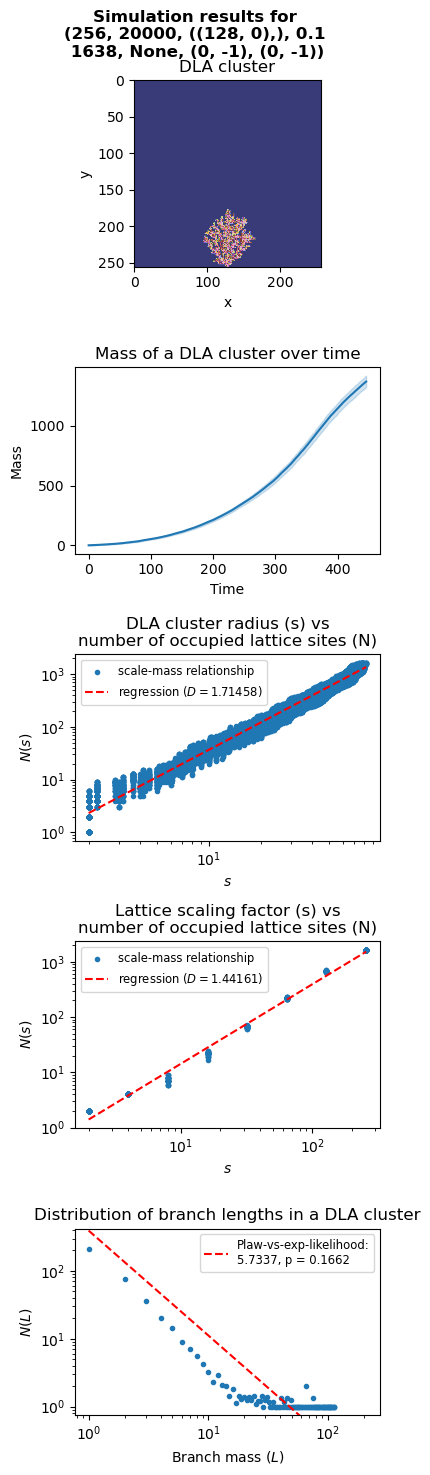

(128, 0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit


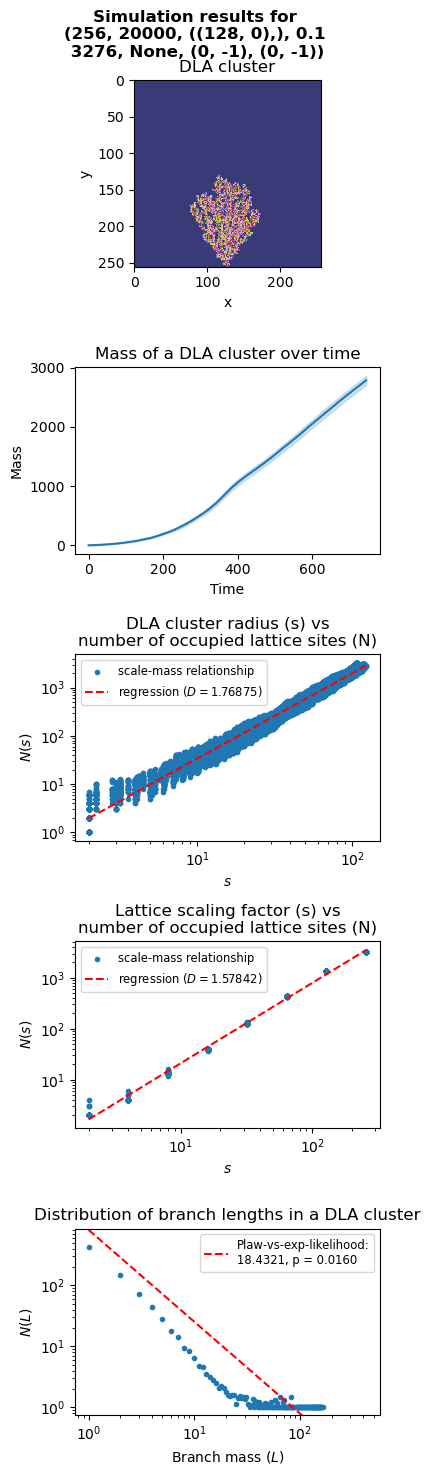

In [6]:
ds.analyse_sim_results(sim_results, dla_evolutions=dla_evolutions)

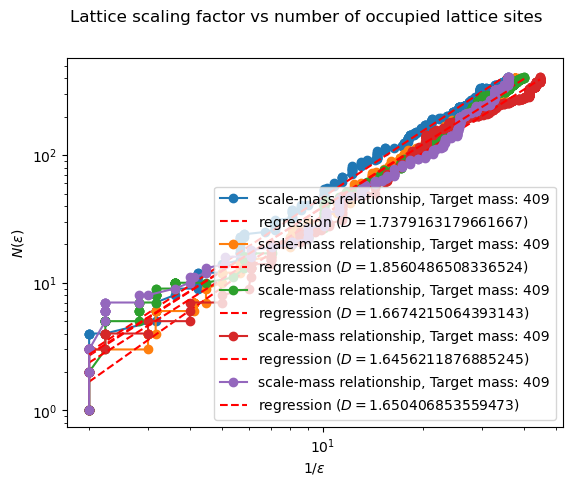

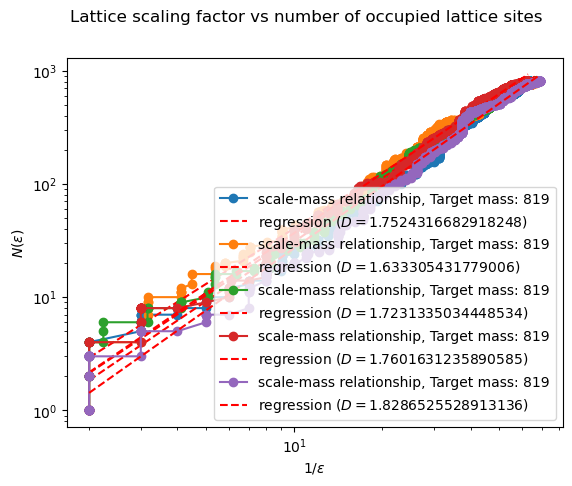

In [50]:
# Unpack results
# scale_series_results = [sr['scale_series'] for sr in sim_results]



for tm in target_mass_series:
    results_filtered = [sr for sr in sim_results if sr['target_mass'] == tm]
    fig, ax = plt.subplots()
    for rf in results_filtered:
        scale_series_results = rf['scale_series']
        n_boxes_results = rf['n_box_series']
        coeffs_results = rf['coeffs']
        vt.plot_fractal_dimension(scale_series_results, n_boxes_results, coeffs_results, ax=ax, label=f", Target mass: {tm}")

plt.show()